# Analysis Theme 2 & 3  - NOT USED IN FINAL REPORT

By Paul Duckworth 22nd Aug 2018.

- Read in the Healthcare Observed Dataset

- Create analysis to explain our Report Themes. 


In [1]:
# encoding=utf8
import os
import numpy as np
import pandas as pd
import getpass
import pickle
import string
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family': 'serif', 'serif':"Computer Modern Roman"})
rc('text', usetex=True)

import seaborn as sns
from scipy.stats import gaussian_kde
%matplotlib inline

## # Input DATA set of observed Occupations and Tasks
datasets = '/home/'+ getpass.getuser() +'/Datasets/'
d = os.path.join(datasets, 'FoHealthcare/Final_dataset_27082018.xlsx')

excel_doc = pd.ExcelFile(d)
dataset = excel_doc.parse(sheet_name='ExpandedTasks')
# dataset = dataset[dataset["clinical"] != 1]

task_dataset = excel_doc.parse(sheet_name='Tasks')
# task_dataset = task_dataset[task_dataset["clinical"] != 1]

print("All Tasks: %s" % str(dataset.shape[0]))
print("Unique Tasks: %s" % len(dataset["Task"].unique()))
out_file_path = "/home/scpd/Dropbox/Documents/Oxford/writing/FutureOfHealthcare_project_docs/FinalReports/Analysis_images/"

cats = {1: 'Low', 2: 'Medium', 3: 'High'}
dataset = dataset.assign(catn = lambda x: np.floor(x['Weighted Average Automation Score']))
dataset['cat'] = dataset['catn'].map(cats)
dataset.head()

All Tasks: 264
Unique Tasks: 108


,Observed Occupation,Task,Task keywords/context,GP Code,DWA Task,DWA ID,Notes,Task also done by,Technology Use,Technology use3,...,partial automation,Future automation potential (FAP),FAP Notes,clinical,structured_work,Task Weight,Automation Scores,Weighted Average Automation Score,catn,cat
0,Administrator,Address problems that arise with building,NaN,BSC,"Notify others of emergencies, problems, or haz...",4.A.4.a.2.I08.D07; 4.A.4.a.2.I08.D04; 4.A.4.a....,NaN,Deputy Practice Manager; Administrator,NaN,NaN,...,no,no,NaN,0,-1,0.20; 0.20; 0.20; 0.20; 0.20;,3.27; 2.90; 3.30; 3.10; 2.46;,3.004637,3.0,High
1,Administrator,Answer phone,NaN,NaN,Answer telephones to direct calls or provide i...,4.A.4.a.3.I03.D11,NaN,Practice Nurse; Nurse Practitioner; Healthcare...,phone,desktop,...,no,no,NaN,0,-1,1.00;,3.15;,3.153151,3.0,High
2,Administrator,Checking for errors in paperwork,NaN,BSC,Check data for recording errors.,4.A.2.a.2.I01.D08,NaN,Administrator; Practice Manager; Secretary,desktop,paper forms,...,no,NaN,NaN,0,-1,1.00;,3.27;,3.272835,3.0,High
3,Administrator,Cleaning up information in the patients electr...,NaN,NaN,Process healthcare paperwork.,4.A.4.c.1.I01.D03,Summarisers do this while they are working wit...,Practice Nurse; Nurse Practitioner; Healthcare...,NaN,NaN,...,NaN,NaN,NaN,0,-1,1.00;,2.91;,2.913987,2.0,Medium
4,Administrator,Connecting human resources/making introduction...,NaN,BSC,Relay information between personnel.,4.A.4.a.2.I03.D11,NaN,Deputy Practice Manager; Administrator,NaN,NaN,...,no,no,NaN,0,-1,1.00;,3.38;,3.375000,3.0,High


## Occupations with all automatable tasks: 

In [2]:
unique_occupations = dataset["Observed Occupation"].unique()
clinical_staff = []
for occ in unique_occupations:
    df = dataset[dataset["Observed Occupation"] == occ]
    df2 = df.groupby("clinical").count()
    print("\n",occ)
    
    try:
        print("clerical = " , df2["Task"][0] / (df2["Task"][0] + df2["Task"][1])*100)
        print("clinical = ", df2["Task"][1] / (df2["Task"][0] + df2["Task"][1])*100)
        clinical_staff.append(occ)
    except KeyError:
        print("clerical = ", df2["Task"][0] / (df2["Task"][0])*100)

    auto_mean = df["Weighted Average Automation Score"].mean()
    auto_std = df["Weighted Average Automation Score"].std()
print(clinical_staff)




 Administrator
clerical =  100.0

 Deputy Practice Manager
clerical =  100.0

 General Practitioner
clerical =  100.0

 Healthcare Assistant
clerical =  100.0

 Nurse Practitioner
clerical =  100.0

 Pharmacy Technician
clerical =  100.0

 Phlebotomist
clerical =  100.0

 Practice Manager
clerical =  100.0

 Practice Nurse
clerical =  100.0

 Practice Pharmacist
clerical =  100.0

 Prescription Clerk
clerical =  100.0

 Receptionist
clerical =  100.0

 Scanning Clerk
clerical =  100.0

 Secretary
clerical =  100.0

 Summariser
clerical =  100.0
[]


In [5]:
n_clinical_tasks = task_dataset["clinical"].sum() 
print(n_clinical_tasks)
print(n_clinical_tasks / task_dataset["clinical"].shape[0])

print(dataset.shape)

print("The amount of clinical vs clerical work, for those occupations who actualy perform clinical tasks")
subset = dataset.loc[dataset['Observed Occupation'].isin(clinical_staff)]
print(subset.groupby("clinical").count()["Task"])
print(69+64)
69/(69+64)

29
0.2116788321167883
(333, 25)
The amount of clinical vs clerical work, for those occupations who actualy perform clinical tasks
clinical
0    64
1    69
Name: Task, dtype: int64
133


0.518796992481203

In [6]:
subset["Observed Occupation"].unique()

array(['General Practitioner', 'Healthcare Assistant',
       'Nurse Practitioner', 'Phlebotomist', 'Practice Nurse'],
      dtype=object)

# Theme 2: Clinical vs Clerical 

In [7]:
clerical_tasks   = task_dataset[task_dataset["clinical"] == 0]
clinical_tasks   = task_dataset[task_dataset["clinical"] == 1]
print(clerical_tasks.shape, clinical_tasks.shape)

(108, 23) (29, 23)


In [8]:
clerical = dataset[dataset["clinical"] == 0]
clinical = dataset[dataset["clinical"] == 1]
print(clerical.shape, clinical.shape)

for df, name in zip([clinical, clerical, dataset], ["clinical", "clerical", "all"] ):  
    y = "Weighted Average Automation Score"
    print("%s avg task automation score: %0.3f (%0.3f)" % (name, df[y].mean(), df[y].std()))

(264, 25) (69, 25)
clinical avg task automation score: 2.781 (0.192)
clerical avg task automation score: 2.901 (0.342)
all avg task automation score: 2.877 (0.320)


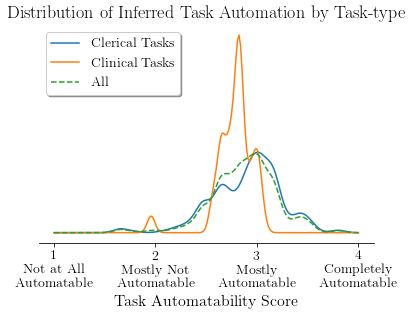

In [17]:
# plot the distribution
fig, ax = plt.subplots()

xs = np.linspace(1,4,200)
datasets = [clerical["Weighted Average Automation Score"], clinical["Weighted Average Automation Score"], dataset["Weighted Average Automation Score"]]
legend_text = ["Clerical Tasks", "Clinical Tasks", "All"]
line_f = ["-", "-", "--"]

for i in range(3):
    y = datasets[i]
    
    density = gaussian_kde(y, 'scott')
    # density = gaussian_kde(y, 'silverman')
    density.covariance_factor = lambda : 0.2
    density._compute_covariance()
    ax.plot(xs, density(xs), ls=line_f[i])
#     ax.vlines(x=2, ymax=max(density(xs)), ymin=0., linestyles='--', linewidth=1., color='k')
#     ax.vlines(x=3, ymax=max(density(xs)), ymin=0., linestyles='--', linewidth=1., color='k')

ax.tick_params(top='off', bottom='on', left='off', right='off', labelleft='off', labelbottom='on')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel("Task Automatability Score", fontsize=16)
ax.set_ylabel("")
ax.legend(legend_text, loc=2, shadow=True, fancybox=True, fontsize=14)
ax.set_xticks([1., 2., 3., 4.])
ax.set_xticklabels(['1\nNot at All\nAutomatable',
                    '2\nMostly Not\nAutomatable',
                    '3\nMostly\nAutomatable',
                    '4\nCompletely\nAutomatable'], fontsize=14)
ax.set_title("Distribution of Inferred Task Automation by Task-type", fontsize=18)
fig.savefig(out_file_path + "Density_of_clini_vs_clen.pdf", bbox_inches='tight')
fig.savefig(out_file_path + "Density_of_clini_vs_clen.png", bbox_inches='tight')

plt.show()

# Theme 3: Stuctured Tasks vs Unstructured Tasks:

- 


In [18]:
## Occupation level comparissons...

struct  = dataset[dataset["structured_work"] == 1]
unstruct = dataset[dataset["structured_work"] == -1]
print(struct.shape, unstruct.shape)

un_occ = unstruct["Observed Occupation"].unique()
occs = struct["Observed Occupation"].unique()

print([i for i in un_occ if i not in occs])

print("\nunstructures employees:", un_occ)
        
print("\nstructures employees:", occs, "\n")

print([i for i in occs if i not in un_occ])

(110, 25) (95, 25)
['Pharmacy Technician', 'Practice Pharmacist']

unstructures employees: ['Administrator' 'Deputy Practice Manager' 'General Practitioner'
 'Healthcare Assistant' 'Nurse Practitioner' 'Pharmacy Technician'
 'Practice Manager' 'Practice Nurse' 'Practice Pharmacist' 'Receptionist'
 'Secretary' 'Summariser']

structures employees: ['Administrator' 'Deputy Practice Manager' 'General Practitioner'
 'Healthcare Assistant' 'Nurse Practitioner' 'Phlebotomist'
 'Practice Manager' 'Practice Nurse' 'Prescription Clerk' 'Receptionist'
 'Scanning Clerk' 'Secretary' 'Summariser'] 

['Phlebotomist', 'Prescription Clerk', 'Scanning Clerk']


In [19]:
print(dataset.shape)
print(dataset.groupby(by="Observed Occupation")["Weighted Average Automation Score"].mean())

(333, 25)
Observed Occupation
Administrator              2.994731
Deputy Practice Manager    2.808431
General Practitioner       2.836413
Healthcare Assistant       2.792508
Nurse Practitioner         2.831746
Pharmacy Technician        2.826334
Phlebotomist               2.743469
Practice Manager           2.754175
Practice Nurse             2.792586
Practice Pharmacist        2.947671
Prescription Clerk         2.894934
Receptionist               3.029017
Scanning Clerk             3.412389
Secretary                  3.035020
Summariser                 2.905111
Name: Weighted Average Automation Score, dtype: float64


In [20]:
## Task Level analysis.
struct   = task_dataset[task_dataset["structured_work"] == 1]
unstruct = task_dataset[task_dataset["structured_work"] == -1]
print(struct.shape, unstruct.shape)

(50, 23) (24, 23)


In [21]:
for df, name in zip([struct, unstruct, dataset], ["structured", "unstuctured", "all"] ):  
    y = "Weighted Average Automation Score"
    print("%s avg task automation score: %0.3f (%0.3f)" % (name, df[y].mean(), df[y].std()))

structured avg task automation score: 2.934 (0.358)
unstuctured avg task automation score: 2.863 (0.328)
all avg task automation score: 2.877 (0.320)


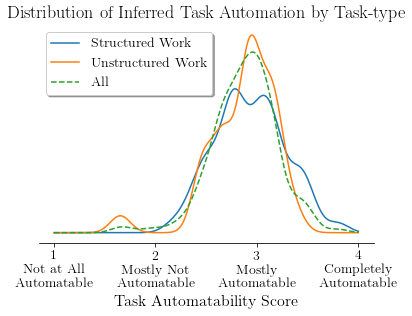

In [31]:
# plot the distribution
fig, ax = plt.subplots()

xs = np.linspace(1,4,200)
datasets = [
    dataset[dataset["structured_work"]==1]["Weighted Average Automation Score"], \
    dataset[dataset["structured_work"]==-1]["Weighted Average Automation Score"], \
    dataset["Weighted Average Automation Score"]]
legend_text = ["Structured Work", "Unstructured Work", "All"]
line_f = ["-", "-", "--"]

for i in range(3):
    y = datasets[i]
    
    density = gaussian_kde(y, 'scott')
    # density = gaussian_kde(y, 'silverman')
    density.covariance_factor = lambda : 0.3
    density._compute_covariance()
    ax.plot(xs, density(xs), ls=line_f[i])
#     ax.vlines(x=2, ymax=max(density(xs)), ymin=0., linestyles='--', linewidth=1., color='k')
#     ax.vlines(x=3, ymax=max(density(xs)), ymin=0., linestyles='--', linewidth=1., color='k')

ax.tick_params(top='off', bottom='on', left='off', right='off', labelleft='off', labelbottom='on')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xlabel("Task Automatability Score", fontsize=16)
ax.set_ylabel("")

ax.legend(legend_text, loc=2, shadow=True, fancybox=True, fontsize=14)
ax.set_xticks([1., 2., 3., 4.])
ax.set_xticklabels(['1\nNot at All\nAutomatable',
                    '2\nMostly Not\nAutomatable',
                    '3\nMostly\nAutomatable',
                    '4\nCompletely\nAutomatable'], fontsize=14)
ax.set_title("Distribution of Inferred Task Automation by Task-type", fontsize=18)

fig.savefig(out_file_path + "Density_of_struct_vs_un.pdf", bbox_inches='tight')
fig.savefig(out_file_path + "Density_of_struct_vs_un.png", bbox_inches='tight')

plt.show()

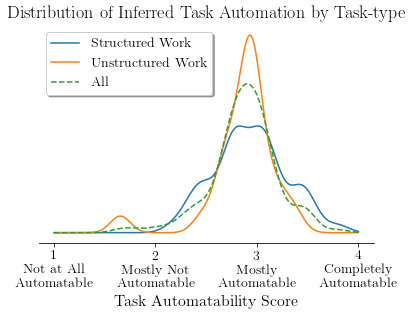

In [27]:
# plot the distribution
fig, ax = plt.subplots()

xs = np.linspace(1,4,200)
datasets = [
    task_dataset[task_dataset["structured_work"]==1]["Weighted Average Automation Score"], \
    task_dataset[task_dataset["structured_work"]==-1]["Weighted Average Automation Score"], \
    task_dataset["Weighted Average Automation Score"]]
legend_text = ["Structured Work", "Unstructured Work", "All"]
line_f = ["-", "-", "--"]

for i in range(3):
    y = datasets[i]
    
    density = gaussian_kde(y, 'scott')
    # density = gaussian_kde(y, 'silverman')
    density.covariance_factor = lambda : 0.3
    density._compute_covariance()
    ax.plot(xs, density(xs), ls=line_f[i])
#     ax.vlines(x=2, ymax=max(density(xs)), ymin=0., linestyles='--', linewidth=1., color='k')
#     ax.vlines(x=3, ymax=max(density(xs)), ymin=0., linestyles='--', linewidth=1., color='k')

ax.tick_params(top='off', bottom='on', left='off', right='off', labelleft='off', labelbottom='on')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel("Task Automatability Score", fontsize=16)
ax.set_ylabel("")

ax.legend(legend_text, loc=2, shadow=True, fancybox=True, fontsize=14)
ax.set_xticks([1., 2., 3., 4.])
ax.set_xticklabels(['1\nNot at All\nAutomatable',
                    '2\nMostly Not\nAutomatable',
                    '3\nMostly\nAutomatable',
                    '4\nCompletely\nAutomatable'], fontsize=14)
ax.set_title("Distribution of Inferred Task Automation by Task-type", fontsize=18)

fig.savefig(out_file_path + "Density_of_struct_vs_un_tasks.pdf", bbox_inches='tight')
fig.savefig(out_file_path + "Density_of_struct_vs_un_tasks.png", bbox_inches='tight')

plt.show()